C:\Users\Saif\AppData\Local\Temp\ipykernel_21508\2112409553.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals_per_90', y='Player', data=top_goals, palette="viridis")


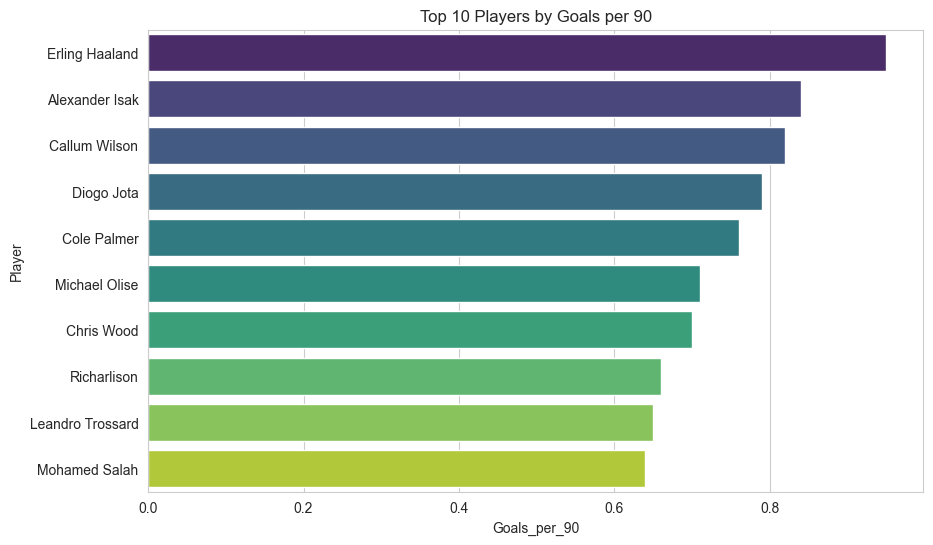

C:\Users\Saif\AppData\Local\Temp\ipykernel_21508\2112409553.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assists_per_90', y='Player', data=top_assists, palette="magma")


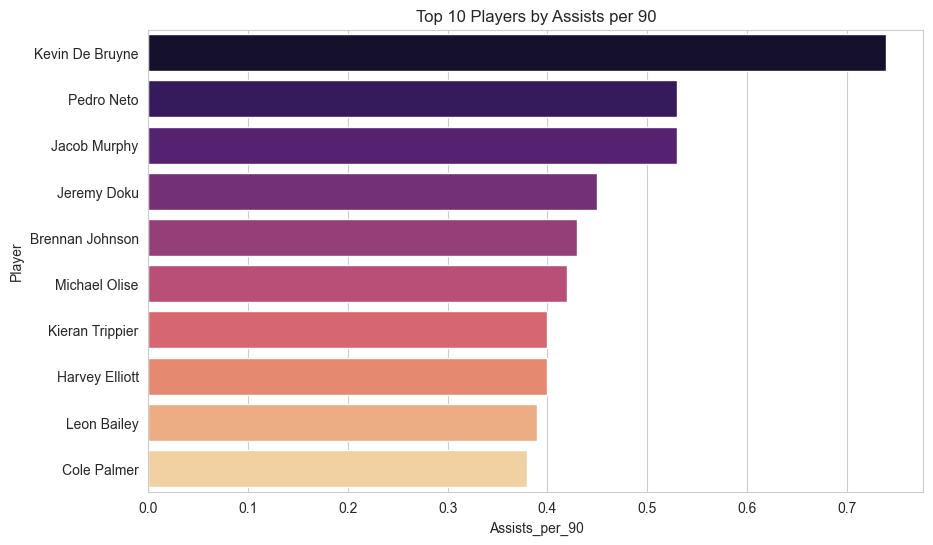

C:\Users\Saif\AppData\Local\Temp\ipykernel_21508\2112409553.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Performance_vs_Expected', y='Player', data=top_overperformers, palette="coolwarm")


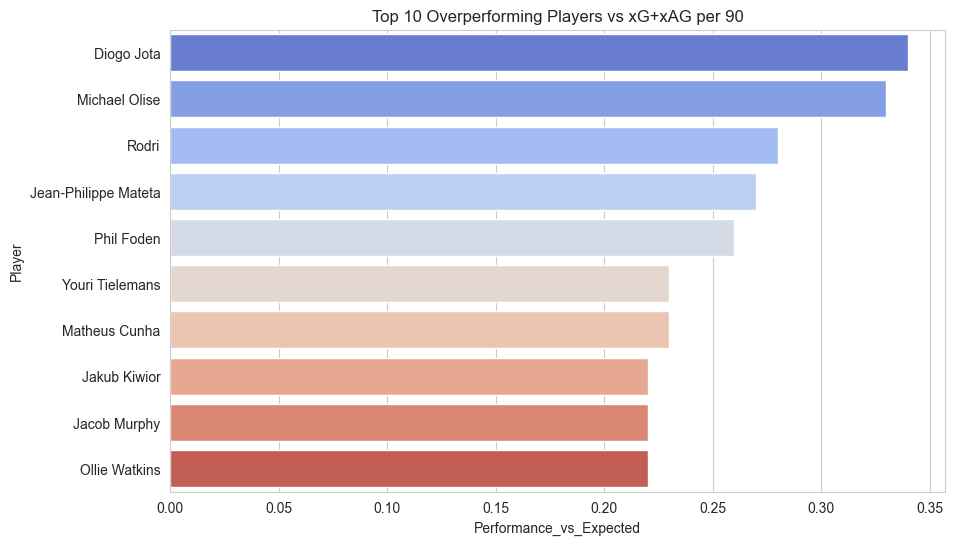

C:\Users\Saif\AppData\Local\Temp\ipykernel_21508\2112409553.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contribution_Score', y='Player', data=top_contributors, palette="plasma")


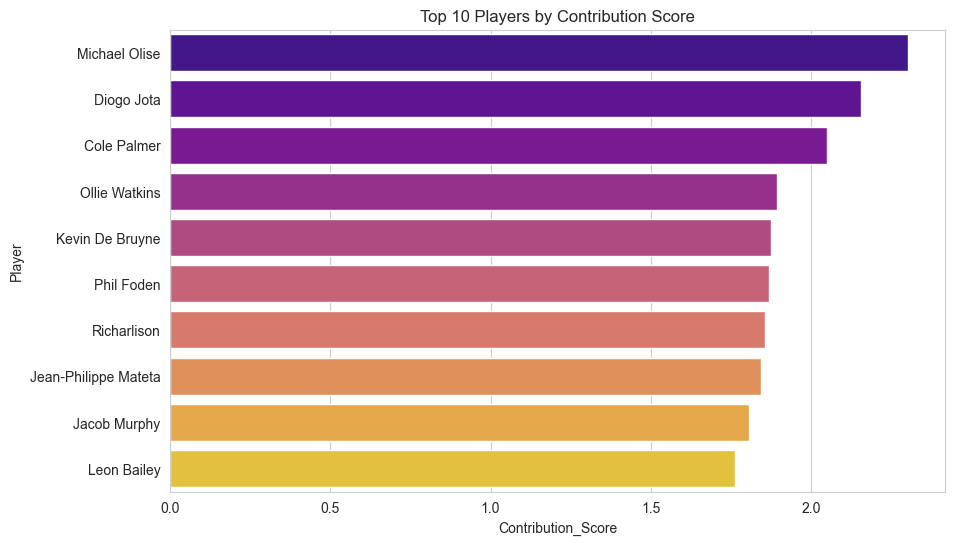


Top 5 Goal Scorers per 90:
             Player              Team  Goals_per_90
6    Erling Haaland   Manchester City          0.95
117  Alexander Isak  Newcastle United          0.84
129   Callum Wilson  Newcastle United          0.82
39       Diogo Jota         Liverpool          0.79
83      Cole Palmer           Chelsea          0.76

Top 5 Assist Providers per 90:
              Player               Team  Assists_per_90
13   Kevin De Bruyne    Manchester City            0.74
409       Pedro Neto      Wolverhampton            0.53
125     Jacob Murphy   Newcastle United            0.53
11       Jeremy Doku    Manchester City            0.45
154  Brennan Johnson  Tottenham Hotspur            0.43

Top 5 Overperforming Players (Contribution > xG+xAG):
                   Player             Team  Contribution_per_90  \
39             Diogo Jota        Liverpool                 1.02   
278         Michael Olise   Crystal Palace                 1.13   
0                   Rodri  Mancheste

In [1]:
# -----------------------------
# EPL Player Analysis Notebook
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 1️⃣ Load dataset
csv_path = r"C:\Users\Saif\Documents\Premier League Data\premier-player-23-24.csv"
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 2️⃣ Filter regular players (>= 900 minutes)
MINUTES_THRESHOLD = 900
df = df[df['Min'] >= MINUTES_THRESHOLD]

# 3️⃣ Per-90 metrics
df['Goals_per_90'] = df['Gls_90']
df['Assists_per_90'] = df['Ast_90']
df['Contribution_per_90'] = df['G+A_90']
df['xG_xAG_per_90'] = df['xG+xAG_90']
df['Performance_vs_Expected'] = df['Contribution_per_90'] - df['xG_xAG_per_90']

# 4️⃣ Contribution Score
df['Goals_norm'] = (df['Goals_per_90'] - df['Goals_per_90'].min()) / (df['Goals_per_90'].max() - df['Goals_per_90'].min())
df['Assists_norm'] = (df['Assists_per_90'] - df['Assists_per_90'].min()) / (df['Assists_per_90'].max() - df['Assists_per_90'].min())
df['Overperf_norm'] = (df['Performance_vs_Expected'] - df['Performance_vs_Expected'].min()) / (df['Performance_vs_Expected'].max() - df['Performance_vs_Expected'].min())
df['Contribution_Score'] = df['Goals_norm'] + df['Assists_norm'] + df['Overperf_norm']

# -----------------------------
# 5️⃣ Charts
# -----------------------------
# Top 10 Goals per 90
top_goals = df.sort_values('Goals_per_90', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Goals_per_90', y='Player', data=top_goals, palette="viridis")
plt.title('Top 10 Players by Goals per 90')
plt.show()

# Top 10 Assists per 90
top_assists = df.sort_values('Assists_per_90', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Assists_per_90', y='Player', data=top_assists, palette="magma")
plt.title('Top 10 Players by Assists per 90')
plt.show()

# Top 10 Overperforming Players
top_overperformers = df.sort_values('Performance_vs_Expected', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Performance_vs_Expected', y='Player', data=top_overperformers, palette="coolwarm")
plt.title('Top 10 Overperforming Players vs xG+xAG per 90')
plt.show()

# Top 10 Contribution Score
top_contributors = df.sort_values('Contribution_Score', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Contribution_Score', y='Player', data=top_contributors, palette="plasma")
plt.title('Top 10 Players by Contribution Score')
plt.show()

# -----------------------------
# 6️⃣ Quick Insights
# -----------------------------
print("\nTop 5 Goal Scorers per 90:")
print(top_goals[['Player','Team','Goals_per_90']].head())

print("\nTop 5 Assist Providers per 90:")
print(top_assists[['Player','Team','Assists_per_90']].head())

print("\nTop 5 Overperforming Players (Contribution > xG+xAG):")
print(top_overperformers[['Player','Team','Contribution_per_90','xG_xAG_per_90','Performance_vs_Expected']].head())

print("\nTop 5 Players by Contribution Score:")
print(top_contributors[['Player','Team','Goals_per_90','Assists_per_90','Performance_vs_Expected','Contribution_Score']].head())
